In [4]:
import pandas as pd
sales = pd.read_csv("/content/archive (5).zip")
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
X = sales[['TV', 'Radio', 'Newspaper']]
y = sales['Sales']

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
from sklearn.metrics import r2_score

pred_sales = model.predict(X)
print("R² Score:", r2_score(y, pred_sales))

R² Score: 0.8972106381789522


In [10]:
pred_sales = model.predict(X)
print("R² Score:", r2_score(y, pred_sales))


R² Score: 0.8972106381789522


In [14]:
import plotly.express as px

fig = px.scatter(
    sales,
    x="TV",
    y="Sales",
    color="Radio",
    size="Newspaper",
    title="📺 Advertising Impact on Sales",
    template="plotly_white"
)
fig.show()

In [16]:
future_ads = pd.DataFrame({
    'TV': [200],
    'Radio': [150],
    'Newspaper': [120]
})

model.predict(future_ads)

array([40.24682183])

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}

for name, model_ in models.items():
    model_.fit(X_train, y_train)
    preds = model_.predict(X_test)
    print(name, "R² Score:", r2_score(y_test, preds))

Linear Regression R² Score: 0.899438024100912
Random Forest R² Score: 0.9818333477552758


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



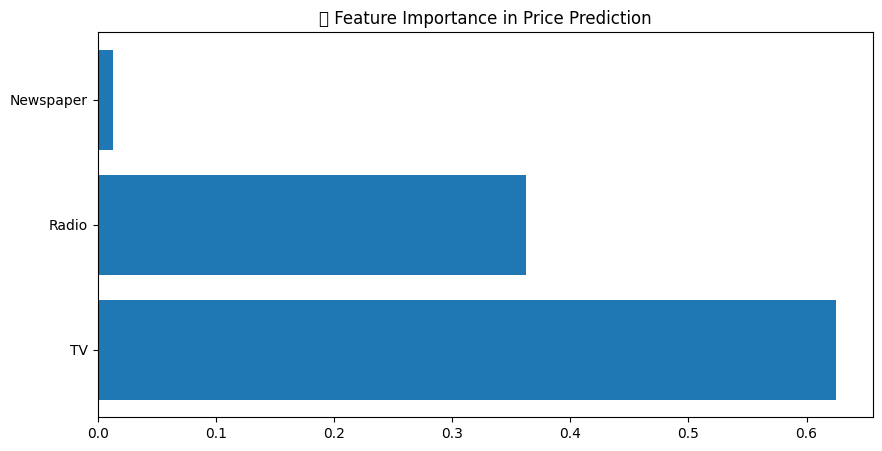

In [22]:
import matplotlib.pyplot as plt

importances = models['Random Forest'].feature_importances_

plt.figure(figsize=(10,5))
plt.barh(X.columns, importances)
plt.title("🔍 Feature Importance in Price Prediction")
plt.show()

In [ ]:
errors = y_test - model.predict(X_test)

plt.figure(figsize=(8,5))
sns.histplot(errors, kde=True)
plt.title("📊 Prediction Error Distribution")
plt.show()


In [27]:
for v in list(globals().keys()):
    if isinstance(globals()[v], pd.DataFrame):
        print(v)

sales
_2
_4
X
future_ads
X_train
X_test
sample


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.



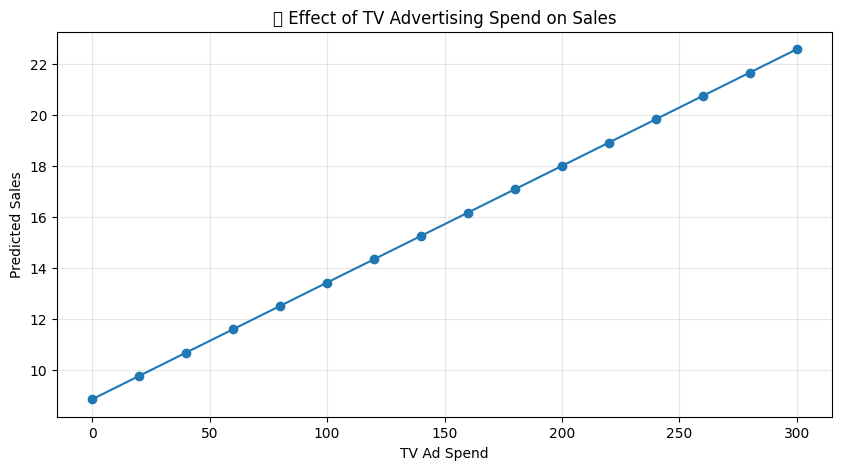

In [28]:
sample = X_test.iloc[[0]].copy()

tv_range = range(0, 301, 20)
pred_sales = []

for tv in tv_range:
    sample['TV'] = tv
    pred_sales.append(model.predict(sample)[0])

plt.figure(figsize=(10,5))
plt.plot(tv_range, pred_sales, marker='o')
plt.title("📺 Effect of TV Advertising Spend on Sales")
plt.xlabel("TV Ad Spend")
plt.ylabel("Predicted Sales")
plt.grid(alpha=0.3)
plt.show()
